### Import Necessary Libraries

In [39]:

import pandas as pd
import zipfile  
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


### Extract and Read the data

In [40]:
zip_path="titanic_data.zip"
extract_path="titanic_data"

os.makedirs(extract_path,exist_ok=True)

with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("extraction comlpleted")

# read the data

df=pd.read_csv("titanic_data/Titanic-Dataset.csv")

extraction comlpleted


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# EDA(Exploratory Data Analysis) Workflow :
* 1) basic inspection
* 2) Missing value analysis
* 3) Target variable analysis
* 4) numerical feature analysis
* 5) categorical feature analysios
* 6) Final Data


### 1) Basic Inspection

In [43]:

df.head()
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* There are total 3 null value columns Age, Cabin and Embarked 

### 2) Missing value analysis

In [44]:

df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [45]:
df["Age"].isnull().sum()
df["Age"].describe()
df["AgeGroup"] = pd.cut(
    df["Age"],bins=[0,12,20,40,60,100],
    labels=["child","teen","adult","middle aged","senior"]
)

In [46]:
df["AgeGroup"].value_counts(normalize=True)*100

AgeGroup
adult          53.921569
middle aged    17.927171
teen           15.406162
child           9.663866
senior          3.081232
Name: proportion, dtype: float64

In [47]:
# df["Age"].fillna(df['Age'].median(),inplace=True)
df.fillna({"Age":df["Age"].median()},inplace=True)

In [48]:
df["Age"].isnull().sum()

0

In [49]:
# df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
df.fillna({"Embarked":df["Embarked"].mode()[0]},inplace=True)

* By getting the sorted data value from the null values we get that the cabin column has highest number of Null values and after that age is the 2nd highest column and least is null is in the Embarked column.

* Creating agegroup column to get the category-wise data of all the age categories.

* Normalized values of the agegroup signifies that 50% are adults.

* Filling the missing values of the ages by the medians of the ages as it is the best estimator based on our data.

### 3) Target variable analysis

In [50]:


df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [51]:
# df.info()

* after looking the value_counts of the survived column we get that the target is modelrately imbalanced hence i will use startify =y while splitting the data

### 4) Numeruical feature analysis 

In [52]:

df.describe()
df["SibSp"].value_counts()
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [53]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult


From above analysis we can see that most of the passengers travelled alone and very few had large families

### 5) categorical feature analysis

In [54]:
# Feature count
print(df["Sex"].value_counts())
print(df["Pclass"].value_counts())
print(df["Embarked"].value_counts())
df["Survived"] = df["Survived"].astype(int)





Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [55]:
# Feature Survival count
print(df.groupby("Sex")["Survived"].mean())
print(df.groupby("Pclass")["Survived"].mean())
print(df.groupby("Embarked")["Survived"].mean())
print(df.groupby("AgeGroup")["Survived"].mean())


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64
AgeGroup
child          0.579710
teen           0.381818
adult          0.397403
middle aged    0.390625
senior         0.227273
Name: Survived, dtype: float64


C:\Users\sckun\AppData\Local\Temp\ipykernel_26372\355083672.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("AgeGroup")["Survived"].mean())


In [56]:
df.groupby(pd.qcut(df["Fare"], 4))["Survived"].mean()

C:\Users\sckun\AppData\Local\Temp\ipykernel_26372\1256130791.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df["Fare"], 4))["Survived"].mean()


Fare
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [57]:
# cross-comparison
pd.crosstab(df["Sex"], df["Pclass"], values=df["Survived"], aggfunc="mean")


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [58]:
df["Age"].isnull().sum()
df["Age"].describe()
df["AgeGroup"] = pd.cut(
    df["Age"],bins=[0,12,20,40,60,100],
    labels=["child","teen","adult","middle aged","senior"]
)

### From above analysis we get the following inferences:

* More female survived that males, despite being lesser than males.
* The higher classes passengers had a good chance of survival that the lower class passenger as seen form above Pclass data for both males and females.
* Out of those embarked more that 50 % survived those who embarked from Cherbourg than those embarked from Southampton and Queenstown.
* from the relationship between ticket fare and survival we get that higher fare meant better chances of survival.

#### Dropping unnecessary columns and creating new feature for familysize.

In [59]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1


#### Encoding genders

In [60]:
df["Sex"] = df["Sex"].map({"male":0,"female":1})


#### Reordering the categories age wise and encoded them in numerical form 

In [61]:

age_order = ["child","teen","adult","middle aged","senior"]
df["AgeGroup"] = df["AgeGroup"].cat.reorder_categories(age_order,ordered=True)
df["AgeGroup"] = df["AgeGroup"].cat.codes

#### Turning text categories into numbers—without confusing the model.

In [62]:
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)


#### Finally Dropping irrelevant and unecessary columns 

In [63]:
df.drop(columns=["SibSp","Parch"],inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int32  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   AgeGroup    891 non-null    int8   
 6   FamilySize  891 non-null    int64  
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int32(1), int64(3), int8(1)
memory usage: 41.0 KB


### Splitting the data

In [65]:
X= df.drop(["Survived"],axis=1)
y=df["Survived"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

### Creating train and test dataframes to save them as csv files for referrence.

In [66]:
train_df= pd.concat([X_train,y_train],axis=1)
test_df= pd.concat([X_test,y_test],axis=1)

train_df.to_csv("train_csv",index=False)
test_df.to_csv("test_csv",index=False)

### Feature scaling

In [67]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [68]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [69]:
y_pred = model.predict(X_test_scaled)
y_pred_proba=model.predict_proba(X_test_scaled)

### Model Evaluation 

In [70]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy = {accuracy}")

Accuracy = 0.7932960893854749


In [71]:
print(f"Precision, recall and F1-score are =\n\n {classification_report(y_test,y_pred)}")

Precision, recall and F1-score are =

               precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



### Final Inference : The baseline Logistic Regression model achieved 79% accuracy. While it performed well in identifying non-survivors, recall for the survivor class was lower(0.68), indicating that some surviving passengers were misclassified. This suggests scope for improvement through feature interactions or non-linear models.

In [72]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[95 15]
 [22 47]]


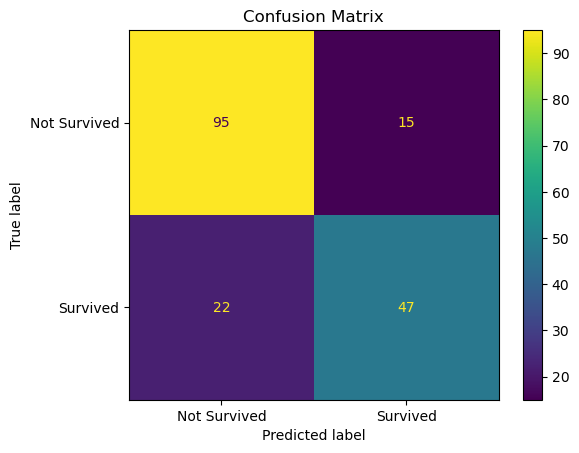

In [73]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Not Survived","Survived"]
)

disp.plot()
plt.title("Confusion Matrix")
plt.show()